# Boxes: a benchmark for free-floating rigid bodies

This test simulates free-floating rigid bodies with and without gravity and verifies that their response matches the predicted analytical solutions.

The relevant physical principles are momentum conservation
and the rotational stability of rigid bodies, sometimes referred to as the
[tennis racket theorem](https://en.wikipedia.org/wiki/Tennis_racket_theorem)
or the Dzhanibekov effect.
Depending on the shape of an object, it may have unstable rotations
about a particular axis, which causes tumbling
([excellent video here](https://www.youtube.com/watch?v=L2o9eBl_Gzw)).

Two scenarios are chosen in this benchmark to represent simple and complex trajectories.
The "simple" scenario has no gravity and stable rotations,
and the "complex" scenario has gravity and unstable rotations.

## Simple scenario

Without gravity, the linear momentum of the rigid body remains constant.
The expected trajectory of the center of mass is to follow a straight line
with constant velocity.
Additionally, the initial angular velocity is aligned with a stable
axis of rotation.
In addition to constant angular momentum, the angular velocity should be constant,
and the cumulative rotation angle will vary linearly with time.

![Simple scenario animation with 5 boxes](img/boxes_5_simple.gif)

## Complex scenario

With gravity, the linear momentum changes linearly with time.
The expected trajectory of the center of mass is parabolic.
Additionally, the initial angular velocity is slightly mis-aligned
from the unstable axis of rotation.
Since no external torques act, the angular momentum  will remain constant,
though that manifests in a tumbling angular velocity.

![Complex scenario animation with 5 boxes](img/boxes_5_complex.gif)


## Definition of coordinate frames and variables

Consider an inertial frame $O$ and a rigid body with coordinate frame $c$ attached at the center of mass:

* The position of the center of gravity (cg) in $O$ is given by $\textbf{c}$.
* The orientation of $c$ with respect to $O$ is given by the quaternion $\textbf{q}$.
* A rotation matrix from $O$ to $c$: $\textbf{R}(\textbf{q})$
* Angular velocity in frame $c$: $\boldsymbol{\omega}$

The rigid body has the following inertial parameters:

* mass $m$
* inertia matrix $\textbf{I}$ expressed in $c$

With uniform gravity vector $\textbf{g}$, momentum and energy of the rigid body are defined as follows:

* Linear momentum in frame $O$: $\textbf{p}(t) = m \dot{\textbf{c}}(t)$
* Angular momentum with respect to $c$, expressed in $O$: $\textbf{L}(t) = \textbf{R}^T(\textbf{q}(t))\textbf{I}\boldsymbol{\omega}(t)$
* Kinetic energy:
$T(t) = \frac{1}{2} m \dot{\textbf{c}}^T(t) \dot{\textbf{c}}(t) +
     \frac{1}{2} \boldsymbol{\omega}^T(t) \textbf{I} \boldsymbol{\omega}(t)$
* Potential energy:
$V(t) = -m \textbf{g}^T \textbf{c}(t)$
* Total energy: $E(t) = T(t) + V(t)$


## Initial conditions

For time $t$, denote the initial conditions:

* $\textbf{c}(t=t_0) = \textbf{c}_0$,
* $\dot{\textbf{c}}(t=t_0) = \dot{\textbf{c}}_0$,
* $\textbf{q}(t=t_0) = \textbf{q}_0$,
* $\boldsymbol{\omega}(t=t_0) = \boldsymbol{\omega}_0$,
* $\textbf{p}(t=t_0) = \textbf{p}_0$,
* $\textbf{L}(t=t_0) = \textbf{L}_0$,
* $T(t=t_0) = T_0$,
* $V(t=t_0) = V_0$,
* $E(t=t_0) = E_0$.

## Inertial parameters for box

These tests use a box of uniform density with relative dimensions 1x4x9
in local coordinate frame $xyz$.

![image](img/box_149.png)

The inertial properties are computed below:

In [1]:
# Python setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'png'
mpl.rcParams.update({'font.size': 16})
import plot_helpers

In [2]:
# Use inertial parameters for uniform box of 10 kg with dimensions 0.1 x 0.4 x 0.9 (m^3)
m = 10.0
box_x = 0.1
box_y = 0.4
box_z = 0.9
Ixx = m/12.0 * (box_y**2 + box_z**2)
Iyy = m/12.0 * (box_z**2 + box_x**2)
Izz = m/12.0 * (box_x**2 + box_y**2)
I = np.diag([Ixx, Iyy, Izz])
print I

[[ 0.80833333  0.          0.        ]
 [ 0.          0.68333333  0.        ]
 [ 0.          0.          0.14166667]]


The box's $x$ axis has the largest inertia, and the $z$ axis has the smallest inertia.
The $y$ axis is thus the unstable rotational axis.

## Analytical solution

With gravity as the only external force, Newton 2nd law implies that the time derivative of linear momentum is equal to the gravitational force:

 * $\dot{\textbf{p}}(t) = m \textbf{g}$

The center of mass acceleration is constant

 * $\ddot{\textbf{c}}(t) = \textbf{g}$,

the velocity is linear in time

 * $\dot{\textbf{c}}(t) = \dot{\textbf{c}}_0 + \textbf{g} (t-t_0)$,

and the position is parabolic in time

 * $\textbf{c}(t) = \textbf{c}_0 + \dot{\textbf{c}}_0(t-t_0) + \frac{1}{2} \textbf{g} (t-t_0)^2$.

With no external torques acting, the angular momentum is conserved:

 * $\textbf{L}(t) = \textbf{L}_0$,
 * $\textbf{R}^T(\textbf{q(t)})\textbf{I}\boldsymbol{\omega}(t) =
    \textbf{R}^T(\textbf{q}_0)\textbf{I}\boldsymbol{\omega}_0$

This implies that the angular momentum vector will be constant in a fixed frame.

Additionally, gravity is a conservative force, so the system is conservative and energy is constant.

* $E(t) = E_0$

### Analytical solution: simple scenario

There are some simplifications of the analytical solution for the simple scenario.
Since gravity is not acting ($\textbf{g} = \textbf{0}$),
the linear velocity reduces to a constant and the position to a linear function of time.
The potential energy is zero, so energy conservation implies that
the kinetic energy is constant:

* $T(t) = T_0$

The specific initial conditions are given as follows:

* $\textbf{c}_0 = [0, 0, 0]^T$
* $\textbf{q}_0$ is identity
* $\dot{\textbf{c}}_0 = [-0.9, 0.4, 0.1]^T$
* $\boldsymbol{\omega}_0 = [0.5, 0, 0]^T$

Note that the angular velocity is aligned with the $x$ axis, which has the largest moment of inertia and thus rotational stability.

The initial angular momentum and energy are computed as:

In [3]:
c_0 = np.array([0, 0, 0])
cdot_0 = np.array([-0.9, 0.4, 0.1])
omega_0 = np.array([0.5, 0, 0])

# initial angular momentum
L_0 = I.dot(omega_0)
print(L_0)

# initial energy
T_0 = 0.5*m * cdot_0.dot(cdot_0) + 0.5 * omega_0.dot(I.dot(omega_0))
print(T_0)

[ 0.40416667  0.          0.        ]
5.00104166667


The scenario is simulated over of a time interval of 10 seconds.

In [4]:
# center of mass position in simple scenario
N = 100
time = np.linspace(0, 10, N)
c_t = np.zeros((N, 3))
for i,t in enumerate(time):
    c_t[i] = c_0 + cdot_0 * t

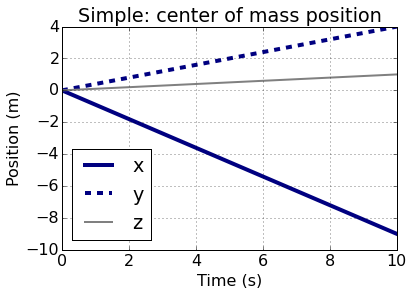

In [5]:
plot_helpers.plotTimePosition3(time, c_t)
plt.title('Simple: center of mass position');

### Analytical solution: complex scenario

The gravity and specific initial conditions for the complex scenario are given as follows:

* $\textbf{g} = [0, 0, -9.8]^T$
* $\textbf{c}_0 = [0, 0, 0]^T$
* $\textbf{q}_0$ is identity
* $\dot{\textbf{c}}_0 = [-2.0, 2.0, 8.0]^T$
* $\boldsymbol{\omega}_0 = [0.1, 5.0, 0.1]^T$

Note that the angular velocity is slightly mis-aligned from the unstable $y$ axis, which has neither the largest nor smallest moment of inertia value and thus rotational instability.

In [6]:
C_0 = np.array([0, 0, 0])
Cdot_0 = np.array([-2.0, 2.0, 8.0])
Omega_0 = np.array([0.1, 5.0, 0.1])
g = np.array([0, 0, -9.8])

# initial angular momentum
L_0 = I.dot(Omega_0)
print(L_0)

# initial energy
T_0 = 0.5*m * Cdot_0.dot(Cdot_0) + 0.5 * Omega_0.dot(I.dot(Omega_0))
V_0 = - m * g.dot(C_0)
E_0 = T_0 + V_0
print(E_0)

# center of mass position in simple scenario
N = 100
time = np.linspace(0, 10, N)
C_t = np.zeros((N, 3))
for i,t in enumerate(time):
    C_t[i] = C_0 + Cdot_0 * t + 0.5 * g * t*t

[ 0.08083333  3.41666667  0.01416667]
368.546416667


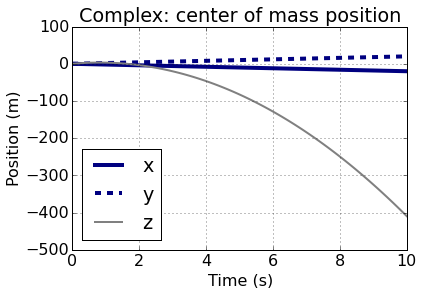

In [7]:
plot_helpers.plotTimePosition3(time, C_t)
plt.title('Complex: center of mass position');

## Inputs, Outputs, and Metrics

### Inputs
This benchmark generates tests of different parameters based on these inputs:

Parameter                    | Type    | Description
---------------------------- | ------- | -----------
Physics engine               | string  | `ode`, `bullet`, `simbody`, or `dart`
Time step in simulation loop | double  | units of seconds
Model count                  | integer | the number of boxes to spawn
Use collision or not         | Boolean |
Simple or Complex scenario   | Boolean |

### Metrics
These errors are measured and saved:

Metric                 | Type     | Description
-----------------------| -------- | -----------
Linear position error  | 3-vector | units of meters
Linear velocity error  | 3-vector | units of meters / second
Angular position error | 3-vector | units of radians
Angular velocity error | 3-vector | units of radians / second
Energy error           | double   | units of J

### Additional outputs
In addition, computation time is measured, by saving these quantities as outputs:

Metric                 | Type   | Description
-----------------------| ------ | -----------
Duration in wall time  | double | units of seconds
Duration in sim time   | double | units of seconds
Duration ratio         | double | wall duration divided by sim duration